# pas runnen vanaf mijn text 'hier runnen'

# ignore


In [1]:
from google.cloud import bigquery
def extract_dataset(coinname,type_table):
        database_id,dataset_id,table_id,client = helper_initialize(coinname,type_table)
        query = """
                select *
                FROM `{}.{}.{}`
                order by last_start_time ASC 
                """.format(database_id, dataset_id,table_id)
        x = client.query(query).to_dataframe()

        return x

def helper_initialize(coinname,type_table):
        '''
        Extract information from keys and use this for the query.
        Determine dataset and table name based on parameters
        '''
        client = bigquery.Client.from_service_account_json("keys.json")
        database_id = client.project
        dataset_id = coinname
        table_id = type_table
        table_ref = client.dataset(dataset_id).table(table_id)
        table = client.get_table(table_ref)  # API request
        return database_id,dataset_id,table_id,client

# imports

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',250)


# open dataset


voor nu haalt hij gewoon de hele dataset op merged hij hem en dan ga ik er daarna de laatste week data of laatste 10080 datapunten uithalen. Wat ik in de toekomst wellicht wil doen is echt alleen de laatste week uit het dataframe trekken! maar zorgen voor later!


In [3]:
data = pd.read_csv('totale_dataset_new_coins.csv')

In [4]:
data['last_start_time']= data['last_start_time']/1000

In [5]:
data.columns

Index(['last_start_time', 'BNBETH__technical_analysis_candles__rsi',
       'BNBETH__technical_analysis_candles__macd',
       'BNBETH__technical_analysis_candles__signal',
       'BNBETH__technical_analysis_candles__macdhist',
       'BNBETH__technical_analysis_candles__sma_5',
       'BNBETH__technical_analysis_candles__sma_10',
       'BNBETH__technical_analysis_candles__sma_21',
       'BNBETH__technical_analysis_candles__sma_50',
       'BNBETH__technical_analysis_candles__sma_100',
       'BNBETH__technical_analysis_candles__sma_200',
       'BNBETH__technical_analysis_candles__sma_1440',
       'BNBETH__technical_analysis_candles__ema_5',
       'BNBETH__technical_analysis_candles__ema_13',
       'BNBETH__technical_analysis_candles__ema_20',
       'BNBETH__technical_analysis_candles__ema_40',
       'BNBETH__technical_analysis_candles__ema_55',
       'BNBETH__technical_analysis_candles__ema_200',
       'BNBETH__technical_analysis_candles__ema_1440',
       'BNBETH__ticker_in

In [6]:
#def get_variance_per_column():
variances = {}
for column in data.columns:
    if column != 'last_start_time':
        variances[column] = abs(data[column].var() / data[column].mean())
        
import operator
sorted_variances = sorted(variances.items(), key=operator.itemgetter(1))

ZeroDivisionError: float division by zero

In [7]:
sorted_variances

NameError: name 'sorted_variances' is not defined

In [127]:
a = data['BNB__events_aggregator__NumMentions_24_hour'].interpolate(method='cubic').to_list()
b = data['BNB__events_aggregator__NumMentions_24_hour'].interpolate(method='linear')
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()


c:\users\jobva\miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:687: RuntimeWarning:

invalid value encountered in less

c:\users\jobva\miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:688: RuntimeWarning:

invalid value encountered in greater



ValueError: A value in x_new is below the interpolation range.

In [128]:
data['BNB__events_aggregator__NumMentions_24_hour'].rolling(24,min_periods=1,).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
60498    7.0
60499    7.0
60500    7.0
60501    7.0
60502    7.0
Name: BNB__events_aggregator__NumMentions_24_hour, Length: 60503, dtype: float64

In [ ]:
import plotly.express as px

fig = px.line(data, x='last_start_time', y='general_info__hash_rate_streamer_bitcoin__difficulty')   #data[column_and_amount_of_nans.index[n]])    #X=timestamp_x
fig.update_layout(
    xaxis = dict(
        tickangle = 45,
        title_text = "timestamps",
        title_font = {"size": 15}))
fig.show()



In [71]:
def get_sequence_of_missing_data(dataframe,column_name):
    '''
    This function checks checks a column and makes a list of lists that contain the sequences of missing data. 
    So when two minutes of missing data are following each others it makes a list of len 2 with the last start time 
    of those sequences. 
        column_name: The name of the column that you want to check for missing data
        dataframe: The dataframe that should be analyzed 
    '''
    missing = dataframe[dataframe[column_name].isna()]['last_start_time'].tolist() #get the last start time of the missing data
    missing_seq = [] #The list with missing sequences 
    for i in range(len(missing)): #iterates through the list of missing start_times
        if i == 0: #the first missing data can never be the second in an sequence. So special case
            current_seq = [missing[i]] 
            first_seq = False      
        elif missing[i]-missing[i-1] == 60: #if the missing data follows another missing point at it to the sequence
            current_seq.append(missing[i])
        else: #if the missing data does not follow another missing point. Close previous sequence and start new one
            missing_seq.append(current_seq)
            current_seq = [missing[i]]
    return missing_seq

#def handle_missing_data(cut_of_point,algorithm_missing_low,algorithm_missing_high)
missing_seq = get_sequence_of_missing_data(data,'BNBBTC__technical_analysis_candles__sma_100')

In [72]:
missing_seq

[[1581042540.0],
 [1581044280.0],
 [1581044880.0],
 [1581045540.0],
 [1581045780.0],
 [1581046080.0],
 [1581046740.0],
 [1581047220.0],
 [1581047460.0],
 [1581047880.0],
 [1581124200.0],
 [1581124380.0],
 [1581125880.0],
 [1581126540.0],
 [1581127080.0],
 [1581127260.0],
 [1581127860.0],
 [1581128400.0],
 [1581129480.0],
 [1581129660.0],
 [1581130080.0],
 [1581130200.0],
 [1581132000.0],
 [1581132600.0],
 [1581133140.0],
 [1581213660.0,
  1581213720.0,
  1581213780.0,
  1581213840.0,
  1581213900.0,
  1581213960.0,
  1581214020.0,
  1581214080.0,
  1581214140.0,
  1581214200.0,
  1581214260.0,
  1581214320.0,
  1581214380.0,
  1581214440.0,
  1581214500.0,
  1581214560.0,
  1581214620.0,
  1581214680.0,
  1581214740.0,
  1581214800.0,
  1581214860.0,
  1581214920.0,
  1581214980.0,
  1581215040.0,
  1581215100.0,
  1581215160.0,
  1581215220.0,
  1581215280.0,
  1581215340.0,
  1581215400.0,
  1581215460.0,
  1581215520.0,
  1581215580.0,
  1581215640.0,
  1581215700.0,
  1581215760.0,

In [ ]:
data = data.set_index('last_start_time') #set index last start time handy for future

In [ ]:

        
def fill_missing_sequences(dataframe,column,missing_sequence,cut_of_point):
    '''
    This function checks if a sequence is considered to be short or long. Based on that it will determine 
    how to fill this missing data
        missing_sequence: a list in a list that contains the last start time of the missing data
        cut_of_point: lengths of sequences greater than this point are considered long and need a different algorithm
        
    '''
    def fill_missing_sequences_short(values):
        '''
        Algorithm to fill the short sequences 
        '''
        for value in row:
            data.at[column,value] = 'test'
    
    def fill_missing_sequences_long(values):
        '''
        Algorithm to fill sequences of missing data that is long
        '''
        for value in row:
            data.at[column,value] = 'test'  
            
    for row in missing_seq:
        if len(row) > cut_of_point:
            
        else:
            print(len(row))
            for value in row:
                print(value)
                data.at[column,value] = 'test2'
            print('dfd')

In [58]:
cut_of_point = 5
column = 'BNBBTC__technical_analysis_candles__sma_100'
for row in missing_seq:
    if len(row) > cut_of_point:
        print(row)
        for value in row:
            data.at[column,value] = 'test'
            print(value)
    else:
        print(len(row))
        for value in row:
            print(value)
            data.at[column,value] = 'test2'
        print('dfd')

1
1582485900.0
dfd
1
1582544760.0
dfd
1
1582558440.0
dfd
1
1582575840.0
dfd
1
1582578480.0
dfd
1
1582579920.0
dfd
1
1582585140.0
dfd
1
1582589700.0
dfd
1
1582605060.0
dfd
1
1582613820.0
dfd
1
1582672560.0
dfd
1
1582678320.0
dfd
1
1582681920.0
dfd
1
1582683240.0
dfd
1
1582683960.0
dfd
1
1582684800.0
dfd
1
1582685580.0
dfd
[1582686360.0, 1582686420.0, 1582686480.0, 1582686540.0, 1582686600.0, 1582686660.0, 1582686720.0]
1582686360.0
1582686420.0
1582686480.0
1582686540.0
1582686600.0
1582686660.0
1582686720.0
1
1583481960.0
dfd
1
1583491020.0
dfd
1
1584579840.0
dfd


In [8]:
def open_sort_select_within_certain_timeframe(dataset,amount_of_days_in_dataset):
    minutes = amount_of_days_in_dataset * 1440
    data = dataset.sort_values(by='last_start_time', ascending=False)
    data = data.reset_index(drop=True)
    zeven_dagen_eerder = data['last_start_time'][1]-60* (minutes)   #find unix time of week earlier
    index_of_zeven_dagen_eerder = data.index[data['last_start_time'] == zeven_dagen_eerder ].tolist() #index of this timestamp
    data = data[1:index_of_zeven_dagen_eerder[0]]
    data = data.reset_index(drop=True)
    return data

In [9]:
data_last_week= open_sort_select_within_certain_timeframe(data,7)
data_last_week

IndexError: list index out of range

In [84]:
def open_sort_select_last_XXX_values(dataset,amount_of_days_in_dataset):
    minutes = amount_of_days_in_dataset *1440
    data = dataset.sort_values(by='last_start_time', ascending=False)
    data = data[1:minutes+1]
    data = data.reset_index(drop=True)
    return data

data_last_10080 = open_sort_select_last_XXX_values(data,7)
data_last_10080

,last_start_time,BNBBTC__technical_analysis_candles__rsi,BNBBTC__technical_analysis_candles__macd,BNBBTC__technical_analysis_candles__signal,BNBBTC__technical_analysis_candles__macdhist,BNBBTC__technical_analysis_candles__sma_5,BNBBTC__technical_analysis_candles__sma_10,BNBBTC__technical_analysis_candles__sma_21,BNBBTC__technical_analysis_candles__sma_50,BNBBTC__technical_analysis_candles__sma_100,BNBBTC__technical_analysis_candles__sma_200,BNBBTC__technical_analysis_candles__sma_1440,BNBBTC__technical_analysis_candles__ema_5,BNBBTC__technical_analysis_candles__ema_13,BNBBTC__technical_analysis_candles__ema_20,BNBBTC__technical_analysis_candles__ema_40,BNBBTC__technical_analysis_candles__ema_55,BNBBTC__technical_analysis_candles__ema_200,BNBBTC__technical_analysis_candles__ema_1440,BNBBTC__ticker_info__open_time,BNBBTC__ticker_info__open,BNBBTC__ticker_info__high,BNBBTC__ticker_info__low,BNBBTC__ticker_info__close_price,BNBBTC__ticker_info__volume,BNBBTC__ticker_info__close_time,BNBBTC__ticker_info__quote_asset_volume,BNBBTC__ticker_info__number_trades,BNBBTC__ticker_info__taker_buy_asset_volume,BNBBTC__ticker_info__taker_buy_quote_asset_volume,BNBBTC__ticker_info__bidPrice,BNBBTC__ticker_info__bidQty,BNBBTC__ticker_info__askPrice,BNBBTC__ticker_info__askQty,BNBBTC__general_info__current_price,BNBBTC__general_info__market_cap,BNBBTC__general_info__market_cap_rank,BNBBTC__general_info__total_volume,BNBBTC__general_info__high_24h,BNBBTC__general_info__low_24h,BNBBTC__general_info__price_change_24h,BNBBTC__general_info__price_change_percentage_24h,BNBBTC__general_info__market_cap_change_24h,BNBBTC__general_info__market_cap_change_percentage_24h,BNBBTC__general_info__circulating_supply,BNBBTC__general_info__total_supply,BNBBTC__general_info__ath,BNBBTC__general_info__ath_change_percentage,BNB__events_aggregator__AvgTone_1_hour,BNB__events_aggregator__AvgTone_8_hour,BNB__events_aggregator__AvgTone_24_hour,BNB__events_aggregator__AvgTone_7_days,BNB__events_aggregator__NumSources_1_hour,BNB__events_aggregator__NumSources_8_hour,BNB__events_aggregator__NumSources_24_hour,BNB__events_aggregator__NumSources_7_days,BNB__events_aggregator__NumArticles_1_hour,BNB__events_aggregator__NumArticles_8_hour,BNB__events_aggregator__NumArticles_24_hour,BNB__events_aggregator__NumArticles_7_days,BNB__events_aggregator__NumMentions_1_hour,BNB__events_aggregator__NumMentions_8_hour,BNB__events_aggregator__NumMentions_24_hour,BNB__events_aggregator__NumMentions_7_days,BNB__events_aggregator__GoldsteinScale_1_hour,BNB__events_aggregator__GoldsteinScale_8_hour,BNB__events_aggregator__GoldsteinScale_24_hour,BNB__events_aggregator__GoldsteinScale_7_days,BNB__events_aggregator__count_1_hour,BNB__events_aggregator__count_8_hour,BNB__events_aggregator__count_24_hour,BNB__events_aggregator__count_7_days,BNB__social_media_data__General_Points,BNB__social_media_data__CryptoCompare_Points,BNB__social_media_data__CryptoCompare_Followers,BNB__social_media_data__CryptoCompare_Posts,BNB__social_media_data__CryptoCompare_Comments,BNB__social_media_data__CryptoCompare_PageViews,BNB__social_media_data__Twitter_Points,BNB__social_media_data__Twitter_lists,BNB__social_media_data__Twitter_favourites,BNB__social_media_data__Twitter_account_creation,BNB__social_media_data__Twitter_followers,BNB__social_media_data__Twitter_statuses,BNB__social_media_data__Twitter_following,BNB__social_media_data__Reddit_Points,BNB__social_media_data__Reddit_posts_per_hour,BNB__social_media_data__Reddit_community_creation,BNB__social_media_data__Reddit_comments_per_hour,BNB__social_media_data__Reddit_comments_per_day,BNB__social_media_data__Reddit_posts_per_day,BNB__social_media_data__Reddit_active_users,BNB__social_media_data__Reddit_subscribers,BNB__social_media_data__Facebook_Points,BNB__social_media_data__Facebook_talking_about,BNB__social_media_data__Facebook_likes,BNB__twitter_info_aggregated__count,BNB__twitter_info_aggregated__total_followers,BNB__twitter_info_aggregated__total_friend

In [85]:
def print_timespan_of_data(dataset):
    print("first time in dataset is:")
    print(datetime.utcfromtimestamp(dataset['last_start_time'].iloc[0]).strftime('%d-%m-%Y %H:%M:%S'))
    print('')
    print("last time in dataset is:")
    print(datetime.utcfromtimestamp(dataset['last_start_time'].iloc[-1]).strftime('%d-%m-%Y %H:%M:%S'))
    
print_timespan_of_data(data_last_week)
print("")
print("")
print("")
print_timespan_of_data(data_last_10080)

first time in dataset is:
19-03-2020 18:22:00

last time in dataset is:
12-03-2020 18:23:00



first time in dataset is:
19-03-2020 18:22:00

last time in dataset is:
12-03-2020 18:23:00


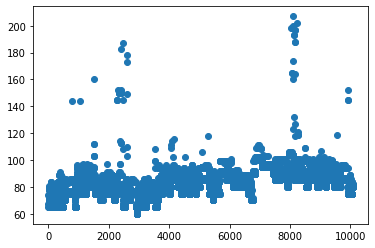

the top 10 rows with the most nans are: [207, 202, 200, 198, 198, 197, 197, 193, 193, 188]

these (index, amount of nans) are: [(8097, 207), (8227, 202), (8106, 200), (8048, 198), (8057, 198), (8178, 197), (8168, 197), (8117, 193), (8127, 193), (8156, 188), (8176, 188)]


In [86]:
def visualize_amount_of_nans(dataset):
    count_of_nans_per_row = dataset.isnull().sum(axis=1)
    index_and_amount_of_nan_tuple,list_of_frequencies_nan =[],[]
    for i in range(len(count_of_nans_per_row)):
        index_and_amount_of_nan_tuple.append((i,count_of_nans_per_row[i]))
        list_of_frequencies_nan.append(count_of_nans_per_row[i])
    list_of_frequencies_nan.sort(reverse = True) 
    top_ten = list_of_frequencies_nan[:10]
    list_index_and_highest_amount_of_nans = []
    for j in index_and_amount_of_nan_tuple:
        for i in top_ten:
            if i == j[1]:
                list_index_and_highest_amount_of_nans.append(j)

    list_index_and_highest_amount_of_nans = list(set([i for i in list_index_and_highest_amount_of_nans]))
    list_index_and_highest_amount_of_nans = sorted(list_index_and_highest_amount_of_nans, key = lambda x: x[1], reverse=True) 
    plt.scatter(*zip(*index_and_amount_of_nan_tuple))
    plt.show()
    
    print("the top 10 rows with the most nans are:", top_ten)
    print('')
    print("these (index, amount of nans) are:", list_index_and_highest_amount_of_nans)
    return list_index_and_highest_amount_of_nans

tuples_with_most_nans = visualize_amount_of_nans(data_last_week)


In [87]:
def check_nan_values_for_index(dataset, row):
    b = dataset.loc[row] 
    c = dataset.columns
    tuple_columnname_and_value, tuple_comlumn_wiht_nan_for_value = [],[]
    for i in range(len(b)):
        tuple_columnname_and_value.append((c[i],b[i]))
    for i in range(len(tuple_columnname_and_value)):
        if tuple_columnname_and_value[i][1] > 0 or tuple_columnname_and_value[i][1] < 0 or tuple_columnname_and_value[i][1] == 0.0:
            pass
        else:
            tuple_comlumn_wiht_nan_for_value.append(tuple_columnname_and_value[i])
    print(len(tuple_comlumn_wiht_nan_for_value))
    return tuple_comlumn_wiht_nan_for_value
            
all_nans = check_nan_values_for_index(data_last_week,603) 
all_nans

84


[('BNB__events_aggregator__AvgTone_1_hour', nan),
 ('BNB__events_aggregator__NumSources_1_hour', nan),
 ('BNB__events_aggregator__NumArticles_1_hour', nan),
 ('BNB__events_aggregator__NumMentions_1_hour', nan),
 ('BNB__events_aggregator__GoldsteinScale_1_hour', nan),
 ('BNB__social_media_data__General_Points', nan),
 ('BNB__social_media_data__CryptoCompare_Points', nan),
 ('BNB__social_media_data__CryptoCompare_Followers', nan),
 ('BNB__social_media_data__CryptoCompare_Posts', nan),
 ('BNB__social_media_data__CryptoCompare_Comments', nan),
 ('BNB__social_media_data__CryptoCompare_PageViews', nan),
 ('BNB__social_media_data__Twitter_Points', nan),
 ('BNB__social_media_data__Twitter_lists', nan),
 ('BNB__social_media_data__Twitter_favourites', nan),
 ('BNB__social_media_data__Twitter_account_creation', nan),
 ('BNB__social_media_data__Twitter_followers', nan),
 ('BNB__social_media_data__Twitter_statuses', nan),
 ('BNB__social_media_data__Twitter_following', nan),
 ('BNB__social_media_dat

In [48]:
def gap_indicater(dataset):
    for i in range(len(dataset['last_start_time'])-1):
        if dataset['last_start_time'][i+1] == dataset['last_start_time'][i]:
            pass
        elif dataset['last_start_time'][i+1] == dataset['last_start_time'][i] - 60:
            pass
        elif dataset['last_start_time'][i+1] - dataset['last_start_time'][i] > 300:
            print('the gap is',(dataset['last_start_time'][i+1] - dataset['last_start_time'][i])/60, 'minutes starting at', dataset['last_start_time'][i])
        else:
            print("the gap started at index",i,"    ",'time:', dataset['last_start_time'][i],'      our time:',
                  datetime.utcfromtimestamp(dataset['last_start_time'][i]).strftime('%d-%m-%Y %H:%M:%S'),'     Gap size',
                  (dataset['last_start_time'][i] - dataset['last_start_time'][i+1])/60, 'minutes' )
            
            
gap_indicater(data_last_week)

the gap started at index 11585      time: 1584506820.0       our time: 18-03-2020 04:47:00      Gap size 2.0 minutes
the gap started at index 11600      time: 1584505860.0       our time: 18-03-2020 04:31:00      Gap size 2.0 minutes
the gap started at index 11603      time: 1584505620.0       our time: 18-03-2020 04:27:00      Gap size 2.0 minutes
the gap started at index 11604      time: 1584505500.0       our time: 18-03-2020 04:25:00      Gap size 2.0 minutes
the gap started at index 11612      time: 1584504960.0       our time: 18-03-2020 04:16:00      Gap size 2.0 minutes
the gap started at index 11642      time: 1584503100.0       our time: 18-03-2020 03:45:00      Gap size 2.0 minutes
the gap started at index 11650      time: 1584502560.0       our time: 18-03-2020 03:36:00      Gap size 2.0 minutes
the gap started at index 11656      time: 1584502140.0       our time: 18-03-2020 03:29:00      Gap size 2.0 minutes
the gap started at index 11658      time: 1584501960.0       our

the gap started at index 50958      time: 1582133460.0       our time: 19-02-2020 17:31:00      Gap size 129.0 minutes
the gap started at index 50991      time: 1582123800.0       our time: 19-02-2020 14:50:00      Gap size 4.0 minutes
the gap started at index 50992      time: 1582123560.0       our time: 19-02-2020 14:46:00      Gap size 201.0 minutes
the gap started at index 53049      time: 1581988140.0       our time: 18-02-2020 01:09:00      Gap size 2.0 minutes
the gap started at index 59714      time: 1581588180.0       our time: 13-02-2020 10:03:00      Gap size 2.0 minutes
the gap started at index 65895      time: 1581217260.0       our time: 09-02-2020 03:01:00      Gap size 61.0 minutes
the gap started at index 67236      time: 1581133200.0       our time: 08-02-2020 03:40:00      Gap size 2.0 minutes
the gap started at index 67244      time: 1581132660.0       our time: 08-02-2020 03:31:00      Gap size 2.0 minutes
the gap started at index 67245      time: 1581132540.0     

In [46]:
# import pandas as pd
# import numpy as np
# settings = {
#     'coin':'ETHBTC',
#     'dataset': 'totale_dataset_26_3_ETHBTC.csv', #if there already is an existing dataset don't make new one 
#     'fill_column_if_cointains':['twitter_info','events_aggregator','econ_bitcoin'] , #columns to fill 
#     'delete_column_if_contains':['CodeRepository'], #columns to delete
#     'greater_than_long_missing':25,#min / greater than this number means that the gab is to long for easy algorithm
#     'easy_algorithm':{'name':'linear'},
#     'difficult_algorithm':{'name':'linear'},#:{'name':'nearest_neigbor', 'neighbors':10},
#     'max_percentage_missing':10
#     }

# #this function checks if you ask for a specific dataset. If not the previous cell just downloaded a dataset and take that one
# from datetime import datetime 
# coinpair=settings['coin']
# day = datetime.today()
# dataset_name = settings['dataset'] if not settings['dataset'] == ' ' else f'totale_dataset_{day.day}_{day.month}_{coinpair}.csv'
# data = pd.read_csv('data/' + dataset_name)
# data['last_start_time']= data['last_start_time']/1000

# data = data.iloc[::-1].reset_index(drop=True)
# data 

# def gap_indicater(dataset,gap_size):
#     print('the gaps bigger than ', gap_size, " minutes are:")
#     for i in range(len(dataset['last_start_time'])-1):
#         if (dataset['last_start_time'][i] - dataset['last_start_time'][i+1])/60 > gap_size:
#             print("the gap started at index",i,"    ",'time:', dataset['last_start_time'][i],'      our time:',
#                   datetime.utcfromtimestamp(dataset['last_start_time'][i]).strftime('%d-%m-%Y %H:%M:%S'),'     Gap size',
#                   (dataset['last_start_time'][i] - dataset['last_start_time'][i+1])/60, 'minutes' )

            
# gap_indicater(data,5)

the gaps bigger than  5  minutes are:
the gap started at index 31302      time: 1583321460.0       our time: 04-03-2020 11:31:00      Gap size 88.0 minutes
the gap started at index 50958      time: 1582133460.0       our time: 19-02-2020 17:31:00      Gap size 129.0 minutes
the gap started at index 50992      time: 1582123560.0       our time: 19-02-2020 14:46:00      Gap size 201.0 minutes
the gap started at index 65895      time: 1581217260.0       our time: 09-02-2020 03:01:00      Gap size 61.0 minutes


In [89]:
def fill_missing_range(df, field, range_from, range_to, range_step=1, fill_with=0):
    filled_dataset = df\
      .merge(how='right', on=field,
            right = pd.DataFrame({field:np.arange(range_from, range_to, range_step)}))\
      .sort_values(by=field).reset_index().fillna(fill_with).drop(['index'], axis=1)
    filled_dataset_new = filled_dataset.sort_values(by='last_start_time', ascending=False)
    filled_dataset_new = filled_dataset_new.reset_index(drop=True)
    return filled_dataset_new

In [90]:
first = int(data_last_week["last_start_time"].iloc[-1])
last = int(data_last_week["last_start_time"].iloc[0])
filled_dataset = fill_missing_range(data_last_week,'last_start_time',first,last+60,60,np.nan)
filled_dataset

,last_start_time,BNBBTC__technical_analysis_candles__rsi,BNBBTC__technical_analysis_candles__macd,BNBBTC__technical_analysis_candles__signal,BNBBTC__technical_analysis_candles__macdhist,BNBBTC__technical_analysis_candles__sma_5,BNBBTC__technical_analysis_candles__sma_10,BNBBTC__technical_analysis_candles__sma_21,BNBBTC__technical_analysis_candles__sma_50,BNBBTC__technical_analysis_candles__sma_100,BNBBTC__technical_analysis_candles__sma_200,BNBBTC__technical_analysis_candles__sma_1440,BNBBTC__technical_analysis_candles__ema_5,BNBBTC__technical_analysis_candles__ema_13,BNBBTC__technical_analysis_candles__ema_20,BNBBTC__technical_analysis_candles__ema_40,BNBBTC__technical_analysis_candles__ema_55,BNBBTC__technical_analysis_candles__ema_200,BNBBTC__technical_analysis_candles__ema_1440,BNBBTC__ticker_info__open_time,BNBBTC__ticker_info__open,BNBBTC__ticker_info__high,BNBBTC__ticker_info__low,BNBBTC__ticker_info__close_price,BNBBTC__ticker_info__volume,BNBBTC__ticker_info__close_time,BNBBTC__ticker_info__quote_asset_volume,BNBBTC__ticker_info__number_trades,BNBBTC__ticker_info__taker_buy_asset_volume,BNBBTC__ticker_info__taker_buy_quote_asset_volume,BNBBTC__ticker_info__bidPrice,BNBBTC__ticker_info__bidQty,BNBBTC__ticker_info__askPrice,BNBBTC__ticker_info__askQty,BNBBTC__general_info__current_price,BNBBTC__general_info__market_cap,BNBBTC__general_info__market_cap_rank,BNBBTC__general_info__total_volume,BNBBTC__general_info__high_24h,BNBBTC__general_info__low_24h,BNBBTC__general_info__price_change_24h,BNBBTC__general_info__price_change_percentage_24h,BNBBTC__general_info__market_cap_change_24h,BNBBTC__general_info__market_cap_change_percentage_24h,BNBBTC__general_info__circulating_supply,BNBBTC__general_info__total_supply,BNBBTC__general_info__ath,BNBBTC__general_info__ath_change_percentage,BNB__events_aggregator__AvgTone_1_hour,BNB__events_aggregator__AvgTone_8_hour,BNB__events_aggregator__AvgTone_24_hour,BNB__events_aggregator__AvgTone_7_days,BNB__events_aggregator__NumSources_1_hour,BNB__events_aggregator__NumSources_8_hour,BNB__events_aggregator__NumSources_24_hour,BNB__events_aggregator__NumSources_7_days,BNB__events_aggregator__NumArticles_1_hour,BNB__events_aggregator__NumArticles_8_hour,BNB__events_aggregator__NumArticles_24_hour,BNB__events_aggregator__NumArticles_7_days,BNB__events_aggregator__NumMentions_1_hour,BNB__events_aggregator__NumMentions_8_hour,BNB__events_aggregator__NumMentions_24_hour,BNB__events_aggregator__NumMentions_7_days,BNB__events_aggregator__GoldsteinScale_1_hour,BNB__events_aggregator__GoldsteinScale_8_hour,BNB__events_aggregator__GoldsteinScale_24_hour,BNB__events_aggregator__GoldsteinScale_7_days,BNB__events_aggregator__count_1_hour,BNB__events_aggregator__count_8_hour,BNB__events_aggregator__count_24_hour,BNB__events_aggregator__count_7_days,BNB__social_media_data__General_Points,BNB__social_media_data__CryptoCompare_Points,BNB__social_media_data__CryptoCompare_Followers,BNB__social_media_data__CryptoCompare_Posts,BNB__social_media_data__CryptoCompare_Comments,BNB__social_media_data__CryptoCompare_PageViews,BNB__social_media_data__Twitter_Points,BNB__social_media_data__Twitter_lists,BNB__social_media_data__Twitter_favourites,BNB__social_media_data__Twitter_account_creation,BNB__social_media_data__Twitter_followers,BNB__social_media_data__Twitter_statuses,BNB__social_media_data__Twitter_following,BNB__social_media_data__Reddit_Points,BNB__social_media_data__Reddit_posts_per_hour,BNB__social_media_data__Reddit_community_creation,BNB__social_media_data__Reddit_comments_per_hour,BNB__social_media_data__Reddit_comments_per_day,BNB__social_media_data__Reddit_posts_per_day,BNB__social_media_data__Reddit_active_users,BNB__social_media_data__Reddit_subscribers,BNB__social_media_data__Facebook_Points,BNB__social_media_data__Facebook_talking_about,BNB__social_media_data__Facebook_likes,BNB__twitter_info_aggregated__count,BNB__twitter_info_aggregated__total_followers,BNB__twitter_info_aggregated__total_friend

In [91]:
filled_dataset['last_start_time'][0]

1584642120.0

In [92]:
def check_if_filled_correctly(dataset):
    print("this are the gaps (nothing means no gaps)")
    gap_indicater(dataset)
    print('--------------------------------------------')
    print('these are the rows with the most nans:')
    tuples_with_most_nans = visualize_amount_of_nans(dataset)
    print(tuples_with_most_nans)
    print("--------------------------------------------")
    print_timespan_of_data(dataset)
    

this are the gaps (nothing means no gaps)
--------------------------------------------
these are the rows with the most nans:


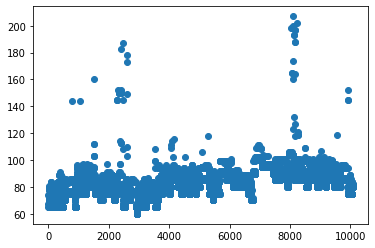

the top 10 rows with the most nans are: [207, 202, 200, 198, 198, 197, 197, 193, 193, 188]

these (index, amount of nans) are: [(8097, 207), (8227, 202), (8106, 200), (8048, 198), (8057, 198), (8178, 197), (8168, 197), (8117, 193), (8127, 193), (8156, 188), (8176, 188)]
[(8097, 207), (8227, 202), (8106, 200), (8048, 198), (8057, 198), (8178, 197), (8168, 197), (8117, 193), (8127, 193), (8156, 188), (8176, 188)]
--------------------------------------------
first time in dataset is:
19-03-2020 18:22:00

last time in dataset is:
12-03-2020 18:23:00


In [93]:
check_if_filled_correctly(filled_dataset)

In [94]:
def save_to_csv_with_current_date(dataset):
    a = datetime.utcfromtimestamp(dataset['last_start_time'][0]).strftime('%d-%m-%Y_%H{}-%M{}-%S{}'.format("h","m","s"))
    dataset.to_csv(f'{a}.csv')

# pas vanaf hier runnen

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',250)

def open_sort_select_within_certain_timeframe(dataset,amount_of_days_in_dataset):
    minutes = amount_of_days_in_dataset * 1440
    data = dataset.sort_values(by='last_start_time', ascending=True)
    data = data.reset_index(drop=True)
    zeven_dagen_eerder = data['last_start_time'][1]+60* (minutes)   #find unix time of week earlier
    index_of_zeven_dagen_eerder = data.index[data['last_start_time'] == zeven_dagen_eerder ].tolist() #index of this timestamp
    data = data[1:index_of_zeven_dagen_eerder[0]]
    data = data.reset_index(drop=True)
    return data

def print_timespan_of_data(dataset):
    print("first time in dataset is:")
    print(datetime.utcfromtimestamp(dataset['last_start_time'].iloc[0]).strftime('%d-%m-%Y %H:%M:%S'))
    print('')
    print("last time in dataset is:")
    print(datetime.utcfromtimestamp(dataset['last_start_time'].iloc[-1]).strftime('%d-%m-%Y %H:%M:%S'))
    
def fill_nan_with_0(dataset, columns_to_replace):
    for i in columns_to_replace:
        dataset[i] = dataset[i].fillna(0)
    return dataset   

def drop_all_columns(dataset,columns_to_drop):
    for i in columns_to_drop:
        dataset = dataset.drop(columns =[i])     
    return dataset

def visualize_amount_of_nans(dataset):
    count_of_nans_per_row = dataset.isna().sum(axis=1)
    index_and_amount_of_nan_tuple =[]
    list_of_frequencies_nan = []
    for i in range(len(count_of_nans_per_row)):
        index_and_amount_of_nan_tuple.append((i,count_of_nans_per_row[i]))
        list_of_frequencies_nan.append(count_of_nans_per_row[i])
    list_of_frequencies_nan.sort(reverse = True) 
    top_ten = list_of_frequencies_nan[:10]
    list_index_and_highest_amount_of_nans = []
    for j in index_and_amount_of_nan_tuple:
        for i in top_ten:
            if i == j[1]:
                list_index_and_highest_amount_of_nans.append(j)
    list_index_and_highest_amount_of_nans = list(set([i for i in list_index_and_highest_amount_of_nans]))
    list_index_and_highest_amount_of_nans = sorted(list_index_and_highest_amount_of_nans, key = lambda x: x[1], reverse=True) 
    plt.scatter(*zip(*index_and_amount_of_nan_tuple))
    plt.show()
    
    print("the top 10 rows with the most nans are:", top_ten)
    print('')
    print("these (index, amount of nans) are:", list_index_and_highest_amount_of_nans)
    return list_index_and_highest_amount_of_nans

def check_nan_values_for_index(dataset, row):
    b = dataset.loc[row] 
    c = dataset.columns
    tuple_columnname_and_value, tuple_comlumn_wiht_nan_for_value = [],[]
    for i in range(len(b)):
        tuple_columnname_and_value.append((c[i],b[i]))
    for i in range(len(tuple_columnname_and_value)):
        if tuple_columnname_and_value[i][1] > 0 or tuple_columnname_and_value[i][1] < 0 or tuple_columnname_and_value[i][1] == 0.0:
            pass
        else:
            tuple_comlumn_wiht_nan_for_value.append(tuple_columnname_and_value[i])
    print(len(tuple_comlumn_wiht_nan_for_value))
    return tuple_comlumn_wiht_nan_for_value

def gap_indicater(dataset):
    for i in range(len(dataset['last_start_time'])-1):
        if dataset['last_start_time'][i] == dataset['last_start_time'][i+1]:
            pass
        elif dataset['last_start_time'][i] == dataset['last_start_time'][i+1] - 60:
            pass
        elif dataset['last_start_time'][i] - dataset['last_start_time'][i+1] > 300:
            print('the gap is',(dataset['last_start_time'][i] - dataset['last_start_time'][i+1])/60, 'minutes starting at', dataset['last_start_time'][i])
        else:
            print("the gap started at index",i,"    ",'time:', dataset['last_start_time'][i+1],'      our time:',
                  datetime.utcfromtimestamp(dataset['last_start_time'][i]).strftime('%d-%m-%Y %H:%M:%S'),'     Gap size',
                  (dataset['last_start_time'][i+1] - dataset['last_start_time'][i])/60, 'minutes' )
            
def fill_missing_range(df, field, range_from, range_to, range_step=1, fill_with=0):
    filled_dataset = df\
      .merge(how='right', on=field,
            right = pd.DataFrame({field:np.arange(range_from, range_to, range_step)}))\
      .sort_values(by=field).reset_index().fillna(fill_with).drop(['index'], axis=1)
    filled_dataset_new = filled_dataset.sort_values(by='last_start_time', ascending=True)
    filled_dataset_new = filled_dataset_new.reset_index(drop=True)
    return filled_dataset_new            

def save_to_csv_with_current_date(dataset):
    a = datetime.utcfromtimestamp(dataset['last_start_time'][0]).strftime('%d-%m-%Y_%H{}-%M{}-%S{}'.format("h","m","s"))
    dataset.to_csv(f'{a}.csv', index=False)

In [96]:
def retrieve_last_week_data(dataset,amount_of_days_in_dataset=7):
    '''external all-including dataset is loaded, last_start_time is transformed to normal unix time (mill to seconds) the 
    last 7 days are extracted, cleaned, sorted en reindexed. some extra exploration takes place (check amount of nans, check 
    start/end time, visualize amount of nans)
    afterwards the minutes that don't have data are filled in with nan values the final dataset is saved to csv file based on
    first time in last_start_Time column''' 
    
    data = pd.read_csv(dataset)
    data['last_start_time']= data['last_start_time']/1000
    data = open_sort_select_within_certain_timeframe(data,amount_of_days_in_dataset)
    
    print('The dataset contains data from:\n')
    print_timespan_of_data(data)
    

    print('\n\n\n\nvisualization of the nan values')
    visualize_amount_of_nans(data)
    print(len(data.columns))
    
    col_to_fill = [] 
    lijst_met_kolommen = list(data.columns)
    for i in range(len(lijst_met_kolommen)):
        if 'twitter_info' in lijst_met_kolommen[i] or 'events_aggregator' in lijst_met_kolommen[i] or 'econ_bitcoin' in lijst_met_kolommen[i]:
            col_to_fill.append(lijst_met_kolommen[i])
    
    data = fill_nan_with_0(data,col_to_fill)
    
    print(len(data.columns))
    visualize_amount_of_nans(data)
    
    col_to_delete = []
    for i in range(len(lijst_met_kolommen)):
        if 'CodeRepository' in lijst_met_kolommen[i]:
            col_to_delete.append(lijst_met_kolommen[i])
            
    data = drop_all_columns(data,col_to_delete)      
    print(len(data.columns))
    visualize_amount_of_nans(data)
    
    print('\n\n\n\nthere are some gaps in the data\n')
    gap_indicater(data)
 
    print('now the data is filled')
    
    #fill in the empty minutes with nan
    first = int(data["last_start_time"].iloc[0])
    last = int(data["last_start_time"].iloc[-1])
    data = fill_missing_range(data,'last_start_time',first,last-60,60,np.nan)

    

    save_to_csv_with_current_date(data)
    
    name = datetime.utcfromtimestamp(data['last_start_time'][0]).strftime('%d-%m-%Y_%H{}-%M{}-%S{}'.format("h","m","s"))
    print('\n\n\nthe dataset is saved to', name, '.csv')
    

The dataset contains data from:

first time in dataset is:
06-02-2020 18:02:00

last time in dataset is:
11-03-2020 18:01:00




visualization of the nan values


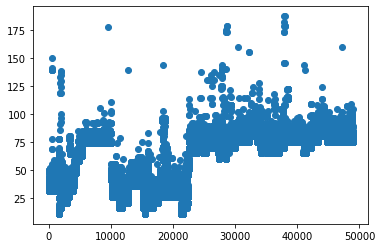

the top 10 rows with the most nans are: [187, 187, 182, 178, 178, 178, 178, 178, 178, 177]

these (index, amount of nans) are: [(37966, 187), (37917, 187), (37907, 182), (28636, 178), (37919, 178), (37957, 178), (38016, 178), (28648, 178), (38007, 178), (9600, 177)]
412
412


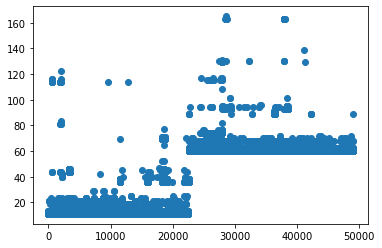

the top 10 rows with the most nans are: [165, 163, 163, 163, 163, 163, 163, 163, 163, 163]

these (index, amount of nans) are: [(28616, 165), (28630, 163), (28487, 163), (28648, 163), (28481, 163), (28636, 163), (37909, 163), (37911, 163), (38007, 163), (37907, 163), (37917, 163), (37966, 163), (37919, 163), (38016, 163), (37957, 163)]
400


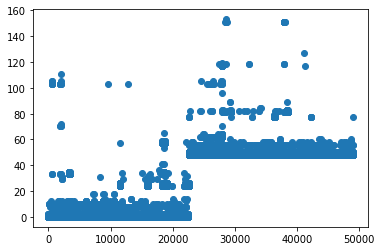

the top 10 rows with the most nans are: [153, 151, 151, 151, 151, 151, 151, 151, 151, 151]

these (index, amount of nans) are: [(28616, 153), (28630, 151), (28648, 151), (28481, 151), (28636, 151), (37909, 151), (37911, 151), (38007, 151), (37917, 151), (37919, 151), (37907, 151), (37957, 151), (37966, 151), (28487, 151), (38016, 151)]




there are some gaps in the data

now the data is filled



the dataset is saved to 06-02-2020_18h-02m-00s .csv


In [97]:
a =retrieve_last_week_data('totale_dataset_12mar.csv', amount_of_days_in_dataset= 34)